# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_speech = pd.read_csv('un_speeches_preprocessed.csv', index_col=[0,1])
df_speech.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...

# Number of sessions and UN members over the years

With the data parsed, we can start looking at the first numbers to explore. We would like to find out if there are are any interesting 
measurements to investigate. We are looking at number of UN members and number of speeches per year.

https://www.un.org/en/about-us/growth-in-un-membership

In [3]:
df_un_yearly_members = pd.read_csv('../data/un_members_per_year.csv', delimiter=';', index_col=1)
df_un_yearly_members.head()

,Number of members
Year,
1945,51
1946,55
1947,57
1948,58
1949,59


# Participation Rate

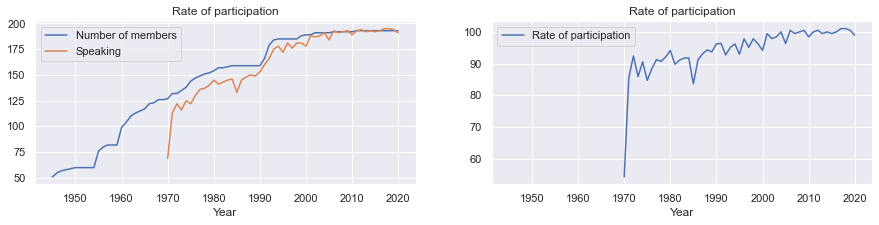

In [4]:
number_of_speeches = df_speech.groupby('Year')['Speech'].count()
number_of_members = df_un_yearly_members['Number of members']
participation_rate = number_of_speeches / number_of_members

fig, (members, rate) = plt.subplots(1, 2, figsize=(15,3), sharex=True)
members.plot(number_of_members, label="Number of members")
members.plot(number_of_speeches, label="Speaking")
members.xaxis.label.set_text("Year")
members.legend()
members.title.set_text("Rate of participation")

rate.plot(participation_rate*100, label="Rate of participation")
rate.xaxis.label.set_text("Year")
rate.legend()
rate.title.set_text("Rate of participation")

## Who were and were not speaking
Firstly, we investigate the basic data set and investigate the attendance rate. 
With this data we see that the first assembly in 1971 had a very low participation rate.

- Some years more speeches than members, which would imply non-member state speeches
- Holy see: Not a member of the UN nations, but granted special "permanent observer state"

In [6]:
country = "Country or Area"
country_per_year = df_speech[country].droplevel('ISO-alpha3 Code').to_frame()
attendance = {}
for c, years in country_per_year.groupby(country):
    attendance[c] = {}
    for year in range(1970,2021):
        if year in years.index:
            attendance[c][year] = 1
        else:
            attendance[c][year] = 0

ga_attendance = pd.DataFrame.from_dict(attendance, orient='index')
ga_attendance.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Afghanistan,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Angola,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1


## Attendence over the years
The following "heat map" shows the attendance of each country per year for all the General assemblies. By looking at this "attenance matrix" we can identify gaps. Some gaps can be explained because the country was not a member of the United Nations at the moment in time. However, other smaller gaps of absence* could indicate a reason for leaving due to events.
On the otherside, Countries could have have reasons for returning as well.

- TODO: highlight a couple countries
- Holy See

*An absence can be driven by reason of politics, economically, conflict, terrorism, war, etc.

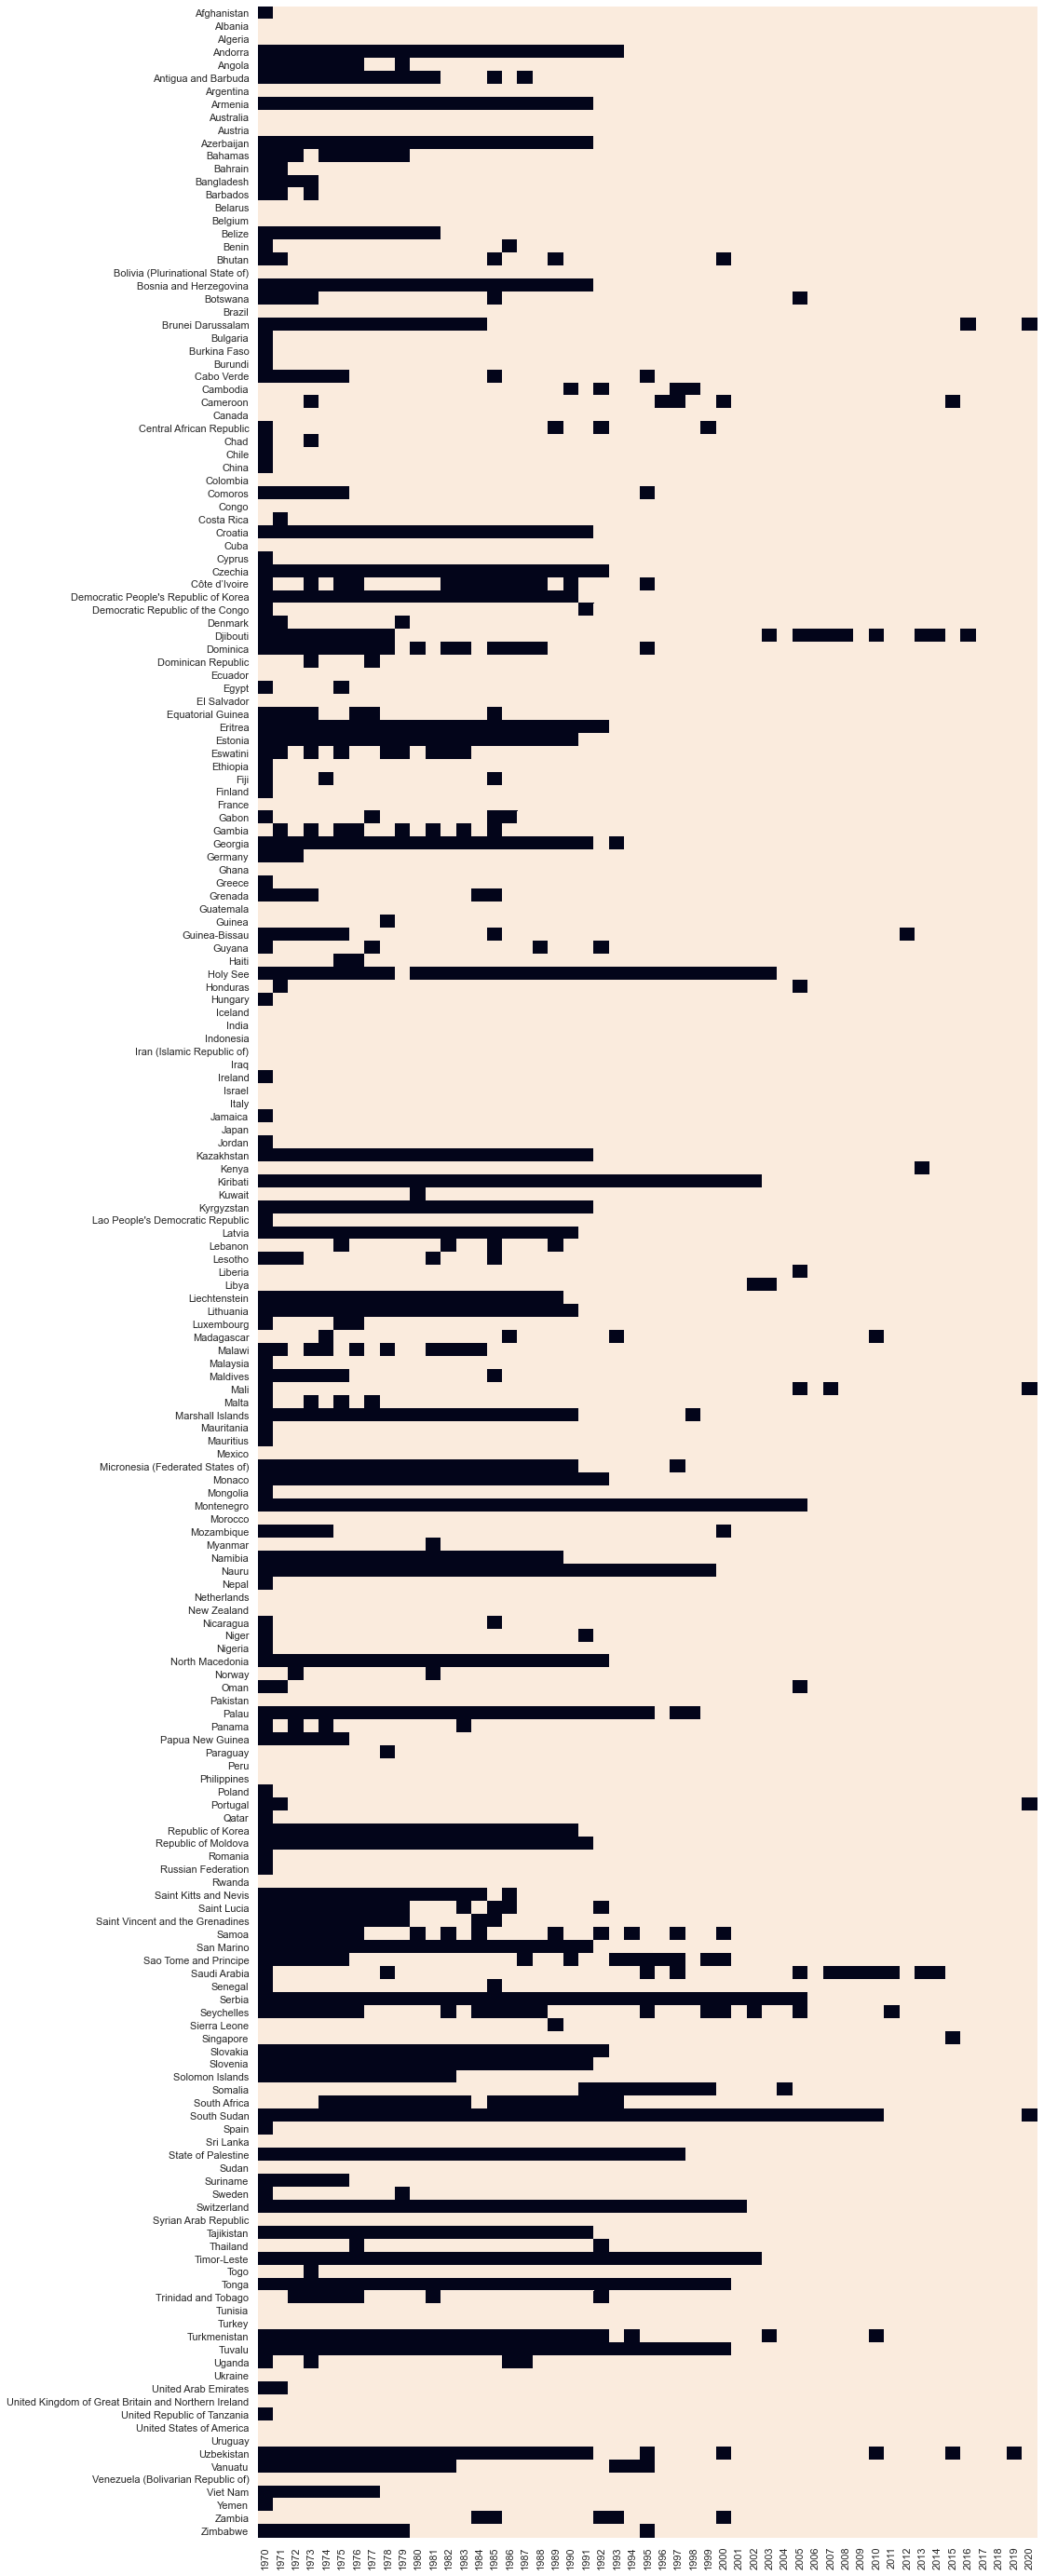

In [7]:
fig, ax = plt.subplots(figsize=(15,50)) 
ax = sns.heatmap(ga_attendance, cbar=False)

## Attence between 2000 and 2020

https://www.un.org/en/about-us/growth-in-un-membership
- South Sudan: Has only been a member since 2011
- TODO: find facts about each country.

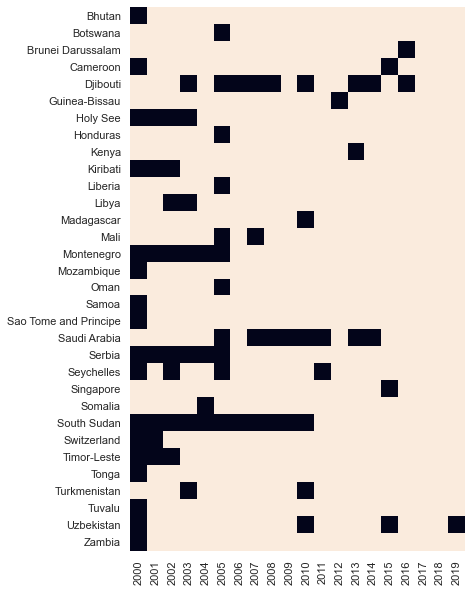

In [8]:
ga_attendence_2000_2020 = ga_attendance[range(2000,2020)]
ga_attendence_2000_2020.head()
absence = ga_attendence_2000_2020[ga_attendence_2000_2020.isin([0]).values.any(axis=1)]
fig, ax = plt.subplots(figsize=(6,10)) 
ax = sns.heatmap(absence, cbar=False)

# Word clouds and cleaning data

In [9]:
import nltk
import re
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# EDA
df_speech["speech_processed"] = df_speech["Speech"].map(lambda speech: re.sub('[,\.!?]', '', speech))
df_speech["speech_processed"] = df_speech["speech_processed"].map(lambda speech: speech.lower())
df_speech.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  \
Year ISO-alpha3 Code                                                      
1970 ALB              33: May I first convey to our President the co...   
     ARG              177.\t : It is a fortunate coincidence that pr...   
     AUS              100.\t  It is a pleasure for me to extend to y...   
     AUT              155.\t  May I begin by expressing to Ambassado...   
     BEL              176. No doubt each of us, before coming up to ...   

                                                       speech_processed  
Year ISO-alpha3 Code                                                     
1970 ALB              33: may i first convey to our president the co...  
     ARG              177\t : it is a fortunate coincidence that pre...  
     AUS              100\t  it is a pleasure for me to extend to yo...  
     AUT              155\t  may i begin by expressing to ambassador...  
     BEL              176 no doubt each of us before coming up to th...

### Wordcloud 1970 - 1980

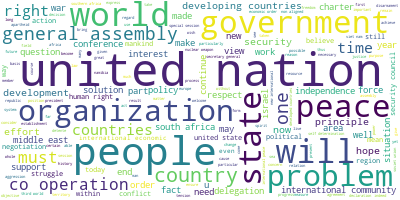

In [29]:
seventies = df_speech.loc(axis=0)[1970:1980,:]["speech_processed"].sum()
wordcloud = WordCloud(background_color='white', random_state=1, contour_color='steelblue')
wordcloud.generate(seventies)
wordcloud.to_image()

### Wordcloud 1980 - 1990

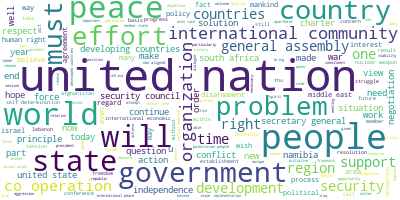

In [30]:
eighties = df_speech.loc(axis=0)[1980:1990,:]["speech_processed"].sum()
wordcloud = WordCloud(background_color='white', random_state=1, contour_color='steelblue')
wordcloud.generate(eighties)
wordcloud.to_image()

### Wordcloud 1990 - 2000

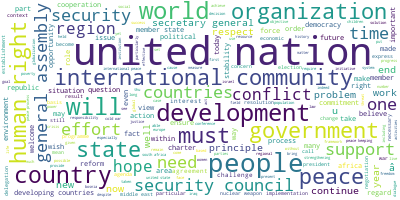

In [31]:
nineties = df_speech.loc(axis=0)[1990:2000,:]["speech_processed"].sum()
wordcloud = WordCloud(background_color='white', random_state=1, contour_color='steelblue')
wordcloud.generate(nineties)
wordcloud.to_image()

### Wordcloud 2000 - 2010

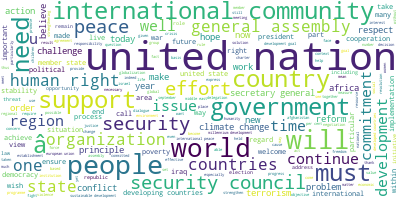

In [33]:
noughties = df_speech.loc(axis=0)[2000:2010,:]["speech_processed"].sum()
wordcloud = WordCloud(background_color='white', random_state=1, contour_color='steelblue')
wordcloud.generate(noughties)
wordcloud.to_image()

### Wordcloud 2010 - 2020

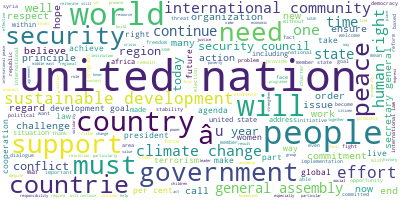

In [34]:
twenty_tens = df_speech.loc(axis=0)[2010:2020,:]["speech_processed"].sum()
wordcloud = WordCloud(background_color='white', random_state=1, contour_color='steelblue')
wordcloud.generate(twenty_tens)
wordcloud.to_image()

## Initial conclusions / points of interest

- Climate change looks to become more an active topic between 2000 - 2020
- South Africa is a common theme between 1980 - 2020 due to Apartheid https://en.wikipedia.org/wiki/Apartheid
- 

# Cleaning up the speeches
Based on the word cloud we can quickly identify and search for words that are overused. Words like "United nation" are over used and we are trying to categorize speeches and subjects.

- TODO: lemmazitation

In [38]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['united', 'nations', 'states', 'general', 'assembly', 'international', 'country', 'countrie', 'countries', 'people', 'peoples', 'world', 'us', 'must', 'also','mr', 'president'])
countries = [country.lower() for country in df_speech["Country or Area"].values]
stop_words.extend(countries)

### Cleaning
- Use gensim
- Describe some basic steps from this source https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
data = df_speech.speech_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
df_speech["speech_cleaned"] = data_words
df_speech["speech_cleaned"] = df_speech["speech_cleaned"].map(lambda array: " ".join(array))
df_speech_cleaned = df_un_members.drop("Speech", axis=1).drop("speech_processed", axis=1)
df_speech_cleaned.head()
df_speech_cleaned.to_csv("speeches_cleaned.csv")